# <center> Neural Networks and Deep Learning (CSCI 5922)</center>
# <center> Spring 2019 </center>

**Name: Ganesh Chandra Satish**
**collaboration with: Rahul Chowdhury**

## Goal

The goal of this assignment is to introduce neural networks in terms of ideas you are already familiar with:  linear regression and linear-threshold classification

## Dataset

You are given a dataset with 2 input variables ($x_1$, $x_2$) and an output variable ($y$).

In [391]:
from sklearn.datasets import make_regression
from matplotlib import pyplot
import numpy as np
import os

# Load data
data = np.loadtxt(os.path.join('data', 'assign1_data.txt'))
X = data[:,:2]
y = data[:, 2]
z = data[:, 3]

## Part 1

Write a program to find the least squares solution to $y = w_1 x_1 + w_2 x_2 + b$ for the above dataset. 

Complete the following function below and use it to answer questions (A) and (B). 

**Note:** Please do not change the interface of the given function.

In [369]:
def lms(X, y):
    """
    Finds the Least Mean Squares solution
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of output value 'y' (size : no of examples X 1)
    
    Returns
    -------
    w : solution array
    """
    bias = np.ones((X.shape[0], 1))
    XplusB = np.concatenate((X, bias), axis=1)
    w = np.dot(np.linalg.inv(np.dot(np.transpose(XplusB),XplusB)),np.dot(np.transpose(XplusB),y))
    return w

(A) Report the values of $w_1$, $w_2$, and $b$.

In [29]:
lms(X, y)
#The value of w1: -2.0442426
#The value of w2: 3.99686017
#The value of b: -0.92429081

(100, 1)


array([-2.0442426 ,  3.99686017, -0.92429081])

(B) What function or method did you use to find the least-squares solution?

### I used the following functions to find the least squares solutions:
#### 1. np.ones to create the bias matrix
#### 2. np.concatenate to concatenate the feature matrix and the bias
#### 3. np.dot to get the dot product of matrices
#### 4. np.linalg.inv to get the inverse of matrix
#### 5. np.transpose to get the transpose of the matrix

## Part 2

Using the LMS algorithm, write a program that determines the coefficients {w1,w2,b} via incremental updating, steepest descent, and multiple passes through the training data. You will need to experiment with updating rules (online, batch, minibatch), step sizes (i.e., learning rates), stopping criteria, etc. Experiment to find settings that lead to solutions with the fewest number of sweeps through the data.

Complete the following functions below and use them to answer questions (A), (B) and (C). You may find the shuffle function from scikit-learn useful. 

Use the following hyperparameters:

Learning rates = [0.001, 0.05, 0.01, 0.05, 0.1, 0.3]

MaxIter = [10, 50, 100, 500, 1000, 5000, 10000, 25000, 50000]

**Note:** Please do not change the interface of the given functions.

In [313]:
from sklearn.utils import shuffle

def online_update(X, y, w, lr):
    """
    One iteration of the online update over the entire dataset (one sweep of the dataset).
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    w : array of coefficients from the previous iteration
    
    Returns
    -------
    w : Coefficients of the classifier (after updating)
    """
    bias = np.ones((X.shape[0], 1))
    XplusB = np.concatenate((X, bias), axis=1)
    for i in range(len(XplusB)):
        yhat = np.dot(w,XplusB[i].T)
        err = (yhat - y[i])
        w -= (err * lr * XplusB[i])
    return w

def batch_update(X, y, w, lr):
    """
    One iteration of the batch update.
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    w : array of coefficients from the previous iteration
    
    Returns
    -------
    w : Coefficients of the classifier (after updating)
    """
    bias = np.ones((X.shape[0], 1))
    XplusB = np.concatenate((X, bias), axis=1)
    yhat = np.dot(XplusB,w)
    err = yhat - y
    w1 = np.dot(XplusB.T,err)/len(XplusB)
    w_new = w - (lr * w1)
    return list(w_new)

def mini_batch_update(X, y, w, lr, batch_size):
    """
    One iteration of the mini-batch update over the entire dataset (one sweep of the dataset).
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    w : array of coefficients from the previous iteration
    batch_size : size of the batch for gradient update
    
    Returns
    -------
    w : Coefficients of the classifier (after updating)
    """
    w_new = w
    for i in range(0, len(X) - batch_size, batch_size):
        w_new = batch_update(X[i:i + batch_size], y[i:i + batch_size], w_new, lr)
    return w_new

def lms_grad_desc(X, y, maxIter, alpha, update, *batch_size):
    """
    Implements the LMS with gradient descent.
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    maxIter : Maximum number of iterations allowed
    alpha : Learning rate
    update : update function to utilize (one of online, batch, mini-batch)
    batch_size : number of examples in a batch (only useful when update = mini_batch_update)
    
    Returns
    -------
    w : Coefficients of the classifier (after updating)
    
    Note : *batch_size is an optional argument and only to be used when doing mini-batch Gradient Descent 
    """
    lr = alpha
    w = [0,0,0]
    for i in range(maxIter):
        w = update(X, y, w, alpha, *batch_size)
    return w

In [322]:
#The cost function
def error_nn(X,y,w):
    err = 0
    for i in range(len(X)):
        err += ((((X[i][0] * w[0]) + (X[i][1] * w[1]) + w[2]) - y[i]) ** 2)/(2 * len(X))
    return err

(A) Report the values of $w_1$, $w_2$, and $b$. 

In [300]:
w = lms_grad_desc(X, y, 1000, 0.01, mini_batch_update, 10)
print("For mini_batch_update, the weights are: w1 = {0}, w2 = {1}, b = {2}".format(w[0],w[1],w[2]))

For mini_batch_update, the weights are: w1 = -2.0557048835609355, w2 = 3.965031270395268, b = -0.9056170741452154


In [304]:
w = lms_grad_desc(X, y, 1000, 0.01, online_update)
print("For online_update, the weights are: w1 = {0}, w2 = {1}, b = {2}".format(w[0],w[1],w[2]))

For online_update, the weights are: w1 = -2.041466416889303, w2 = 4.0011969052109775, b = -0.9216826914982416


In [305]:
w = lms_grad_desc(X, y, 10000, 0.01, batch_update)
print("For batch_update, the weights are: w1 = {0}, w2 = {1}, b = {2}".format(w[0],w[1],w[2]))

For batch_update, the weights are: w1 = -2.0432272821414523, w2 = 3.990710131005567, b = -0.921645354049784


(B) What settings worked well for you:  online vs. batch vs. minibatch? What step size? How did you decide to terminate?

I decided to use the above mentioned epoch list and alpha list and tested to find the best alpha and epoch based on the combinationation for which the error was minimum. With that, the results were:

For online update:
Best Weights and bias: [-2.04402426  3.99722808 -0.92410096]
Best Alpha: 0.001
Best Epoch: 5000
Minimum Error: 0.019704536797008485

For batch update:
Best Weights and bias: [-2.04424259513769, 3.9968601686592633, -0.9242908118675359]
Best Alpha: 0.05
Best Epoch: 25000
Minimum Error: 0.0197044217069761

For mini batch update:
Best Weights and bias: [-2.0580656769274883, 3.978207779202587, -0.9072980057407031]
Best Alpha: 0.01
Best Epoch: 1000
Minimum Error: 0.01973044793200897

The code that calculated these values is present below

In [325]:
lr= [0.001, 0.05, 0.01, 0.05, 0.1, 0.3]
mi = [10, 50, 100, 500, 1000, 5000, 10000, 25000, 50000]
di = {}
for l in lr:
    di[l] = {}
    for m in mi:
        di[l][m] = lms_grad_desc(X, y, m, l, online_update)

In [327]:
lr= [0.001, 0.05, 0.01, 0.05, 0.1, 0.3]
mi = [10, 50, 100, 500, 1000, 5000, 10000, 25000, 50000]
di = {}
for l in lr:
    di[l] = {}
    for m in mi:
        di[l][m] = lms_grad_desc(X, y, m, l, batch_update)

In [329]:
lr= [0.001, 0.05, 0.01, 0.05, 0.1, 0.3]
mi = [10, 50, 100, 500, 1000, 5000, 10000, 25000, 50000]
di = {}
for l in lr:
    di[l] = {}
    for m in mi:
        di[l][m] = lms_grad_desc(X, y, m, l, mini_batch_update,10)

In [330]:
err = 9999
lrans = 0
ite = 0
w = []
for lr,ites in di.items():
    for k,v in ites.items():
        ans = error_nn(X,y,v)
        if ans < err:
            err = ans
            w = v
            lrans = lr
            ite = k
print(w,lrans,ite,err)

[-2.0580656769274883, 3.978207779202587, -0.9072980057407031] 0.1 1000 0.01973044793200897


(C) Make a graph of error on the entire data set as a function of epoch. An epoch is a complete sweep through all the data.

Please find the graph below. The below code has been used to generate the graph. I have used epoch values of 10, 50, 100, 500, 1000, 5000, 10000, 25000 and 50000 as the data points for epochs.

In [348]:
mi = [10, 50, 100, 500, 1000, 5000, 10000, 25000, 50000]
online2 = {}
batch2 = {}
mini2 = {}
#lms_grad_desc(X, y, maxIter, alpha, update, *batch_size):
for i in mi:
    temp1 = lms_grad_desc(X, y, i, 0.01, online_update)
    temp2 = lms_grad_desc(X, y, i, 0.01, batch_update)
    temp3 = lms_grad_desc(X, y, i, 0.01, mini_batch_update,10)
    online2[i] = error_nn(X,y,temp1)
    batch2[i] = error_nn(X,y,temp2)
    mini2[i] = error_nn(X,y,temp3)

In [388]:
import matplotlib
matplotlib.rc('figure', figsize = (14, 7))
import matplotlib.pyplot as plt
def plot(o,b,m):
    x = []
    y = []
    for k,v in o.items():
        x.append(k)
        y.append(v)
    plt.plot(x, y)
    x = []
    y = []
    for k,v in b.items():
        x.append(k)
        y.append(v) 
    plt.plot(x, y)
    x = []
    y = []
    for k,v in m.items():
        x.append(k)
        y.append(v)
    plt.plot(x, y)
    plt.title("Error vs Epochs")
    plt.xlabel("epochs")
    plt.ylabel("Error")
    plt.legend(['Online Update', 'Batch update', 'Mini-Batch update'], loc='upper right')
    plt.show()

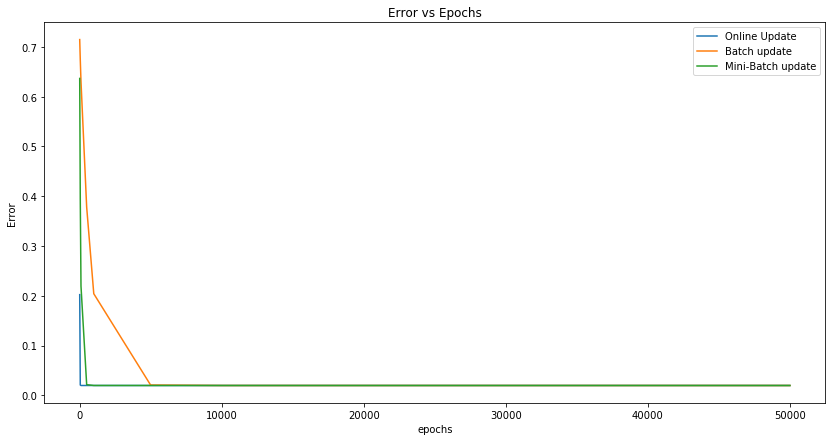

In [389]:
plot(online2,batch2,mini2)

## Part 3

The data set from a regression problem can be converted into a classification problem simply by using the sign of (+ or -) as representing one of two classes. In the data set used in Part 1 and 2, you'll see a variable that represents this binary (0 or 1) class.

Use the perceptron learning rule to solve for the coefficients {$w_1$, $w_2$, $b$} of this classification problem.   

Two warnings: First, your solution to Part 3 should require only a few lines of code changed from the code you wrote for Part 2. Second, the Perceptron algorithm will not converge if there is no exact solution to the training data. It will jitter among coefficients that all yield roughly equally good solutions.

Complete the following functions below and use them to answer questions (A) and (B). 

**Note:** Please do not change the interface of the given functions.

In [377]:
def perceptron_update(X, y, w, lr):
    """
    One iteration of the Perceptron update over the entire dataset (not just a single point).
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    w : array of coefficients from the previous iteration
    
    Returns
    -------
    w : Coefficients of the classifier (after updating)
    incorrect : Incorrectly classified examples
    """
    bias = np.ones((X.shape[0], 1))
    XplusB = np.concatenate((X, bias), axis=1)
    w1,w2,b = w[0],w[1],w[2]
    incorrect = []
    for i in range(len(XplusB)):
        ytemp = np.dot([w1,w2,b],XplusB[i].T)
        yhat = 0
        if ytemp > 0:
            yhat = 1
        err = (yhat - y[i])
        if err != 0:
            incorrect.append([XplusB[i][0],XplusB[i][1]])
        b = b - (lr * err)
        w1 = w1 - (lr * err * XplusB[i][0])
        w2 = w2 - (lr * err * XplusB[i][1])
    return ([w1,w2,b],incorrect)

def perceptron(X, y, maxIter, alpha):
    """
    Implements the Perceptron algorithm.
    
    Parameters
    ----------
    X : NumPy array of features (size : no of examples X features)
    y : Numpy array of class labels (size : no of examples X 1)
    maxIter : The maximum number of iterations allowed 
    alpha : Learning Rate
    
    Returns
    -------
    w : Coefficients of the classifier
    incorrect : Incorrectly classified examples on termination
    """
    w = [0,0,0]
    incorrect = []
    for i in range(maxIter):
        temp = perceptron_update(X, y, w, alpha)
        w = temp[0]
        incorrect = temp[1]
    return (w,incorrect)

(A) Report the values of coefficients $w_1$, $w_2$, and $b$.

w1: -0.02349469999999508
w2: 0.038361000000002726
The bias is: -0.007
The minimum error count was: 5

In [392]:
ty = perceptron(X, z, 5000, 0.001)
ty[0]

5


[-0.02349469999999508, 0.038361000000002726, -0.007]

(B) Make a graph of the accuracy (% correct classification) on the training set as a function of epoch.

Plese find the graph below. The graph has been generated for alpha of 0.001. The reason is, i got the least number of incorrect answers when i used alpha 0.001 and epoch of 5000. The two cells below were used to find the best alpha and epoch. The next two cells were used to generate the graph

In [381]:
lr= [0.001, 0.05, 0.01, 0.05, 0.1, 0.3]
mi = [10, 50, 100, 500, 1000, 5000, 10000, 25000, 50000]
incorrect = 9999
blr = 0
bm = 0
for l in lr:
    for m in mi:
        temp = perceptron(X, z, m, l)
        if len(temp[1]) < incorrect:
            blr = l
            bm = m
            incorrect = len(temp[1])

In [382]:
print(incorrect,blr,bm)

5 0.001 5000


In [384]:
mi = [10, 50, 100, 500, 1000, 5000, 10000, 25000, 50000]
per = {}
for i in mi:
    temp = perceptron(X, z, i, 0.001)
    per[i] = (len(X) - len(temp[1])) / len(X)

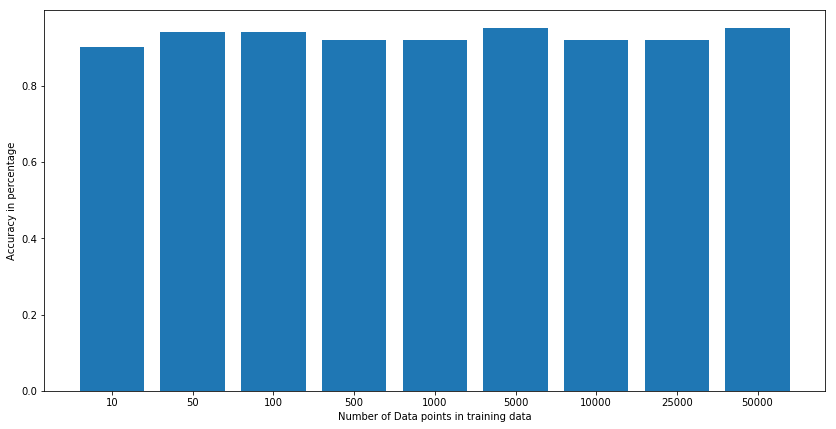

In [385]:
import pylab as plt
x = []
y = []
z = [1,2,3,4,5,6,7,8,9]
for k,v in per.items():
    x.append(k)
    y.append(v)
plt.bar(z,y,align='center')
plt.xticks(z, x)
plt.xlabel("Number of Data points in training data")
plt.ylabel("Accuracy in percentage")
plt.show()

## Part 4

In machine learning, we really want to train a model based on some data and then expect the model to do well on "out of sample" data. Try this with the code you wrote for Part 3:  Train the model on the first {5, 10, 25, 50, 75} examples in the data set and test the model on the final 25 examples.

Complete the following function below and use it to answer (A). 

**Note:** Please do not change the interface of the given function.

In [287]:
def classify(X, y, w):
    """
    Use this function to classify examples in the test set
    
    Parameters
    ----------
    X : Test set features
    y : Test set labels
    w : Perceptron coefficients
    
    Returns
    -------
    correct : number of correctly classified examples
    """
    #train_data_size = 5
    correct = 0
    bias = np.ones((X.shape[0], 1))
    XplusB = np.concatenate((X, bias), axis=1)
    for i in range(len(XplusB)):
        ytemp = np.dot(w,XplusB[i].T)
        yhat = 0
        if ytemp >= 0:
            yhat = 1
        
        if yhat == y[i]:
            correct += 1
    return correct

In [288]:
def train75(X, y, w,train_data_size):    
    xtrain = X[:train_data_size + 1]
    ytrain = y[:train_data_size + 1]
    xtest = X[(len(X) - 25):]
    ytest = y[(len(y) - 25):]
    ans = perceptron(xtrain, ytrain, 50000, 0.01)
    w = ans[0]
    cor = classify(xtest, ytest, w)
    return cor

How does performance on the test set vary with the amount of training data? Make a bar graph showing performance for each of the different training set sizes.

The accuracy initially increses and later stays the same with the increse in the training data. PLease find the graph below

In [289]:
nans = {}
tsize = [5, 10, 25, 50, 75]
for i in tsize:
    nans[i] = train75(X, z, [0,0,0],i) / 25

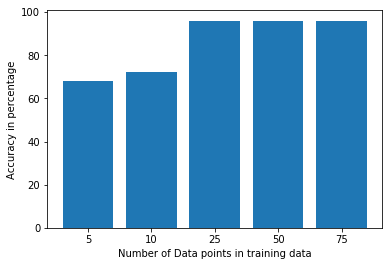

In [292]:
import pylab as plt
x = []
y = []
z = [1,2,3,4,5]
for k,v in nans.items():
    x.append(k)
    y.append(v * 100)
plt.bar(z,y,align='center')
plt.xticks(z, x)
plt.xlabel("Number of Data points in training data")
plt.ylabel("Accuracy in percentage")
plt.show()

### It can be seen from the above graph and the values prited after, the accuracy gradually increases as the training data increses, and eventually becomes a constant.